# 📊 S&P 500 예측 시장 - 탐색적 데이터 분석 (EDA)

이 노트북에서는 Hull Tactical Market Prediction 데이터를 탐색합니다.

## 목표
1. 데이터 구조 이해
2. 결측치 패턴 분석
3. 피처 분포 확인
4. 타겟 변수 (forward_returns, market_forward_excess_returns) 분석
5. 시계열 트렌드 파악

In [1]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 시각화 설정
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

print("✅ 라이브러리 로드 완료")

✅ 라이브러리 로드 완료


## 1️⃣ 데이터 로드

In [2]:
# 데이터 경로
DATA_DIR = Path('../data/raw')

# 데이터 로드
train = pd.read_csv(DATA_DIR / 'train.csv')
test = pd.read_csv(DATA_DIR / 'test.csv')

print(f"📁 Train shape: {train.shape}")
print(f"📁 Test shape: {test.shape}")
print(f"\n✅ 데이터 로드 완료")

📁 Train shape: (9021, 98)
📁 Test shape: (10, 99)

✅ 데이터 로드 완료


## 2️⃣ 기본 정보 확인

In [3]:
# Train 데이터 기본 정보
print("=" * 80)
print("📋 TRAIN 데이터 정보")
print("=" * 80)
print(f"\n행 개수: {len(train):,}")
print(f"컬럼 개수: {len(train.columns)}")
print(f"\n컬럼 목록:")
print(train.columns.tolist())

print("\n" + "=" * 80)
print("첫 5개 행:")
print("=" * 80)
train.head()

📋 TRAIN 데이터 정보

행 개수: 9,021
컬럼 개수: 98

컬럼 목록:
['date_id', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'E1', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E2', 'E20', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'M1', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'P1', 'P10', 'P11', 'P12', 'P13', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'S1', 'S10', 'S11', 'S12', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'V1', 'V10', 'V11', 'V12', 'V13', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'forward_returns', 'risk_free_rate', 'market_forward_excess_returns']

첫 5개 행:


,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,0,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002421,0.000301,-0.003038
1,1,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008495,0.000303,-0.009114
2,2,0,0,0,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009624,0.000301,-0.010243
3,3,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004662,0.000299,0.004046
4,4,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011686,0.000299,-0.012301


In [4]:
# Test 데이터 기본 정보
print("=" * 80)
print("📋 TEST 데이터 정보")
print("=" * 80)
print(f"\n행 개수: {len(test):,}")
print(f"컬럼 개수: {len(test.columns)}")
print(f"\n특별 컬럼:")
print(f"  - is_scored: {test['is_scored'].value_counts().to_dict()}")
print(f"  - lagged_forward_returns 존재: {'lagged_forward_returns' in test.columns}")
print(f"  - lagged_risk_free_rate 존재: {'lagged_risk_free_rate' in test.columns}")
print(f"  - lagged_market_forward_excess_returns 존재: {'lagged_market_forward_excess_returns' in test.columns}")

print("\n" + "=" * 80)
print("첫 5개 행:")
print("=" * 80)
test.head()

📋 TEST 데이터 정보

행 개수: 10
컬럼 개수: 99

특별 컬럼:
  - is_scored: {True: 9, False: 1}
  - lagged_forward_returns 존재: True
  - lagged_risk_free_rate 존재: True
  - lagged_market_forward_excess_returns 존재: True

첫 5개 행:


,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V4,V5,V6,V7,V8,V9,is_scored,lagged_forward_returns,lagged_risk_free_rate,lagged_market_forward_excess_returns
0,8980,0,0,0,0,1,0,0,1,0,...,0.828042,0.999172,0.759921,-0.803127,0.170966,-0.751909,True,0.003541,0.000161,0.003068
1,8981,0,0,0,0,1,0,0,1,0,...,0.831349,1.120336,0.556217,-0.686192,0.141865,-0.660326,True,-0.005964,0.000162,-0.006437
2,8982,0,0,0,0,1,0,0,0,1,...,0.832672,1.088992,0.665344,-0.459367,0.199405,-0.510979,True,-0.007410,0.000160,-0.007882
3,8983,0,0,0,0,1,0,0,0,1,...,0.835979,1.040988,0.594577,-0.561643,0.161706,-0.575997,True,0.005420,0.000160,0.004949
4,8984,0,0,0,0,0,0,1,0,1,...,0.839947,0.944593,0.715608,-0.692649,0.124669,-0.654045,True,0.008357,0.000159,0.007887


## 3️⃣ 피처 그룹별 분류

In [5]:
# 피처 그룹화
feature_groups = {
    'M': [],  # Market Dynamics/Technical
    'E': [],  # Macro Economic
    'I': [],  # Interest Rate
    'P': [],  # Price/Valuation
    'V': [],  # Volatility
    'S': [],  # Sentiment
    'MOM': [],  # Momentum
    'D': []  # Dummy/Binary
}

for col in train.columns:
    if col.startswith('MOM'):
        feature_groups['MOM'].append(col)
    elif col.startswith('M'):
        feature_groups['M'].append(col)
    elif col.startswith('E'):
        feature_groups['E'].append(col)
    elif col.startswith('I'):
        feature_groups['I'].append(col)
    elif col.startswith('P'):
        feature_groups['P'].append(col)
    elif col.startswith('V'):
        feature_groups['V'].append(col)
    elif col.startswith('S'):
        feature_groups['S'].append(col)
    elif col.startswith('D'):
        feature_groups['D'].append(col)

print("=" * 80)
print("📦 피처 그룹별 개수")
print("=" * 80)
for group, features in feature_groups.items():
    print(f"{group:10s}: {len(features):3d}개 - {features[:3]}{'...' if len(features) > 3 else ''}")

print(f"\n총 피처 개수: {sum(len(v) for v in feature_groups.values())}")

📦 피처 그룹별 개수
M         :  18개 - ['M1', 'M10', 'M11']...
E         :  20개 - ['E1', 'E10', 'E11']...
I         :   9개 - ['I1', 'I2', 'I3']...
P         :  13개 - ['P1', 'P10', 'P11']...
V         :  13개 - ['V1', 'V10', 'V11']...
S         :  12개 - ['S1', 'S10', 'S11']...
MOM       :   0개 - []
D         :   9개 - ['D1', 'D2', 'D3']...

총 피처 개수: 94


## 4️⃣ 결측치 분석

In [6]:
# 결측치 통계
missing_stats = pd.DataFrame({
    'Missing Count': train.isnull().sum(),
    'Missing %': (train.isnull().sum() / len(train) * 100).round(2)
}).sort_values('Missing Count', ascending=False)

missing_stats = missing_stats[missing_stats['Missing Count'] > 0]

print("=" * 80)
print("🔍 결측치가 있는 컬럼 (상위 20개)")
print("=" * 80)
print(missing_stats.head(20))

print(f"\n결측치가 있는 컬럼 개수: {len(missing_stats)}개")
print(f"결측치 없는 컬럼 개수: {len(train.columns) - len(missing_stats)}개")

🔍 결측치가 있는 컬럼 (상위 20개)
     Missing Count  Missing %
E7            6969      77.25
V10           6049      67.05
S3            5733      63.55
M1            5547      61.49
M13           5540      61.41
M14           5540      61.41
M6            5043      55.90
V9            4539      50.32
S12           3537      39.21
M5            3283      36.39
M2            3217      35.66
S8            3009      33.36
M3            2018      22.37
E1            1784      19.78
P6            1638      18.16
E20           1616      17.91
P7            1616      17.91
P5            1574      17.45
V5            1512      16.76
S5            1511      16.75

결측치가 있는 컬럼 개수: 85개
결측치 없는 컬럼 개수: 13개


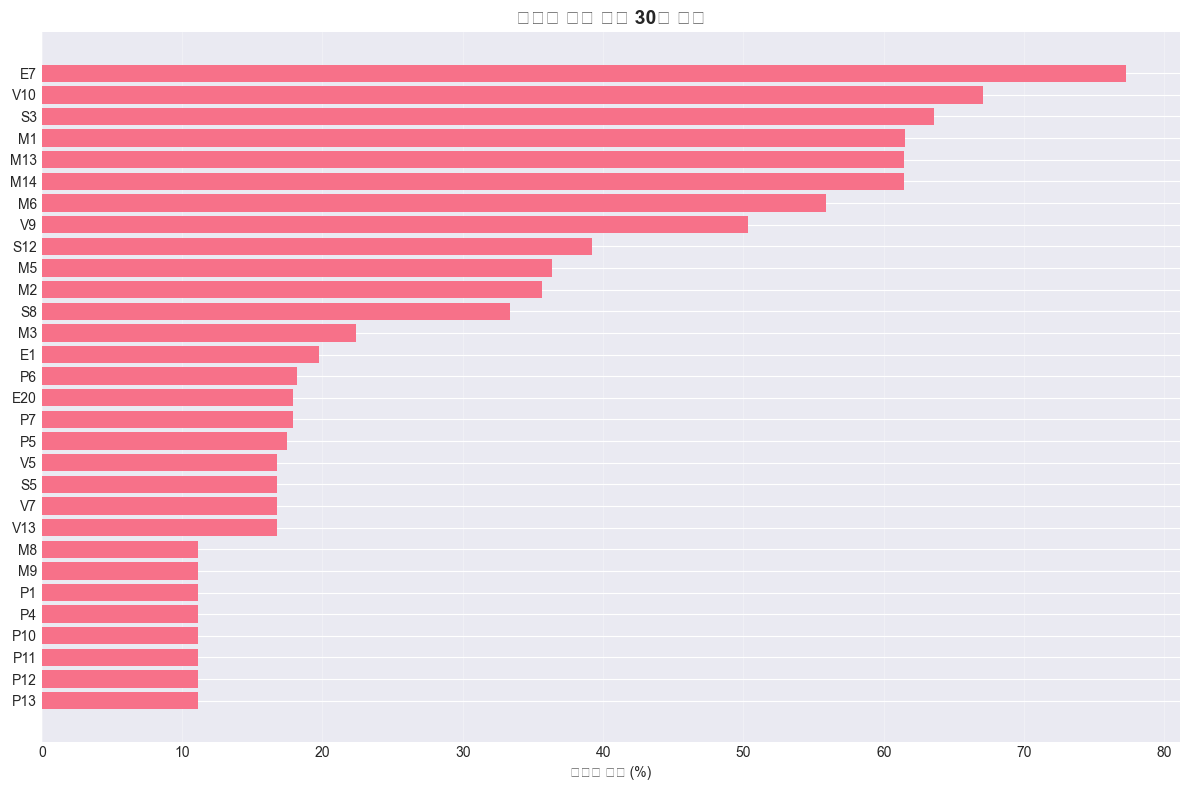

📊 결측치 비율이 높은 피처들이 초기 데이터(과거)에 집중되어 있을 가능성 확인 필요


In [7]:
# 결측치 시각화 (상위 30개)
plt.figure(figsize=(12, 8))
missing_top30 = missing_stats.head(30)
plt.barh(range(len(missing_top30)), missing_top30['Missing %'])
plt.yticks(range(len(missing_top30)), missing_top30.index)
plt.xlabel('결측치 비율 (%)')
plt.title('결측치 비율 상위 30개 피처', fontsize=14, weight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("📊 결측치 비율이 높은 피처들이 초기 데이터(과거)에 집중되어 있을 가능성 확인 필요")

## 5️⃣ 타겟 변수 분석

In [8]:
# 타겟 변수 기본 통계
target_cols = ['forward_returns', 'risk_free_rate', 'market_forward_excess_returns']

print("=" * 80)
print("🎯 타겟 변수 기본 통계")
print("=" * 80)
print(train[target_cols].describe())

# 결측치 확인
print("\n결측치:")
print(train[target_cols].isnull().sum())

🎯 타겟 변수 기본 통계
       forward_returns  risk_free_rate  market_forward_excess_returns
count      9021.000000     9021.000000                    9021.000000
mean          0.000471        0.000107                       0.000053
std           0.010541        0.000088                       0.010558
min          -0.039754       -0.000004                      -0.040582
25%          -0.004319        0.000008                      -0.004747
50%           0.000659        0.000097                       0.000255
75%           0.005896        0.000193                       0.005479
max           0.040661        0.000317                       0.040551

결측치:
forward_returns                  0
risk_free_rate                   0
market_forward_excess_returns    0
dtype: int64


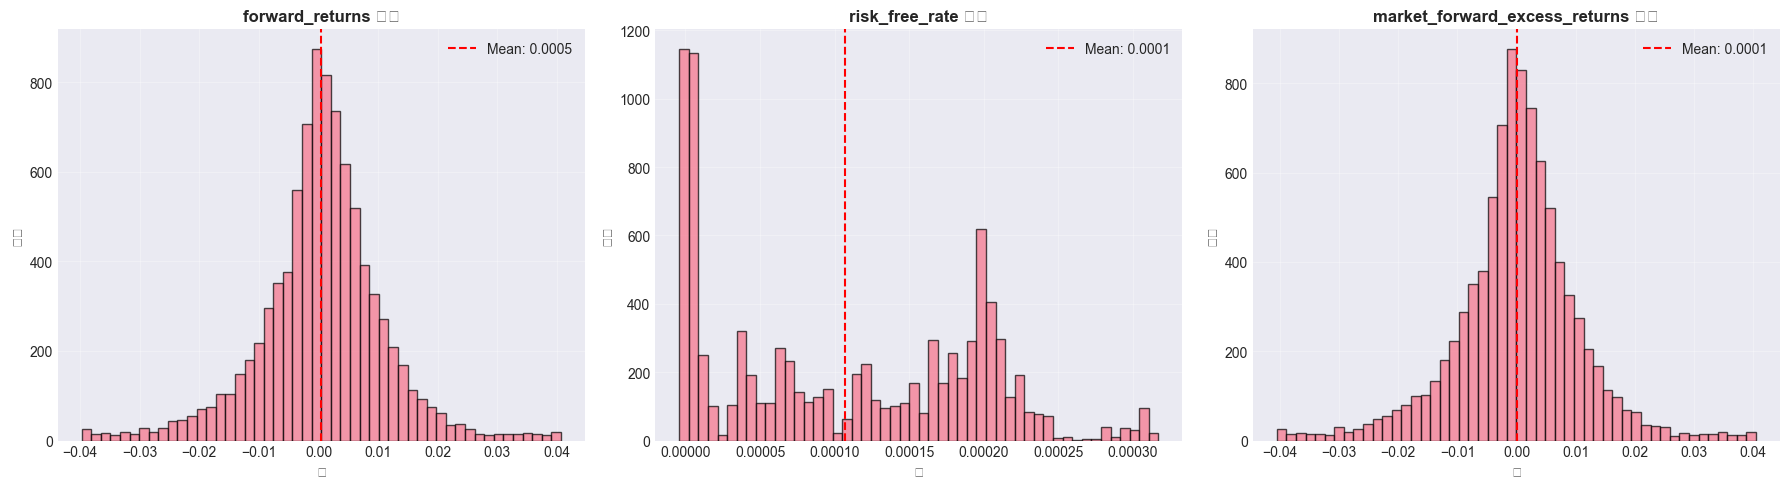

In [9]:
# 타겟 변수 분포 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(target_cols):
    axes[i].hist(train[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'{col} 분포', fontsize=12, weight='bold')
    axes[i].set_xlabel('값')
    axes[i].set_ylabel('빈도')
    axes[i].axvline(train[col].mean(), color='red', linestyle='--', label=f'Mean: {train[col].mean():.4f}')
    axes[i].legend()
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

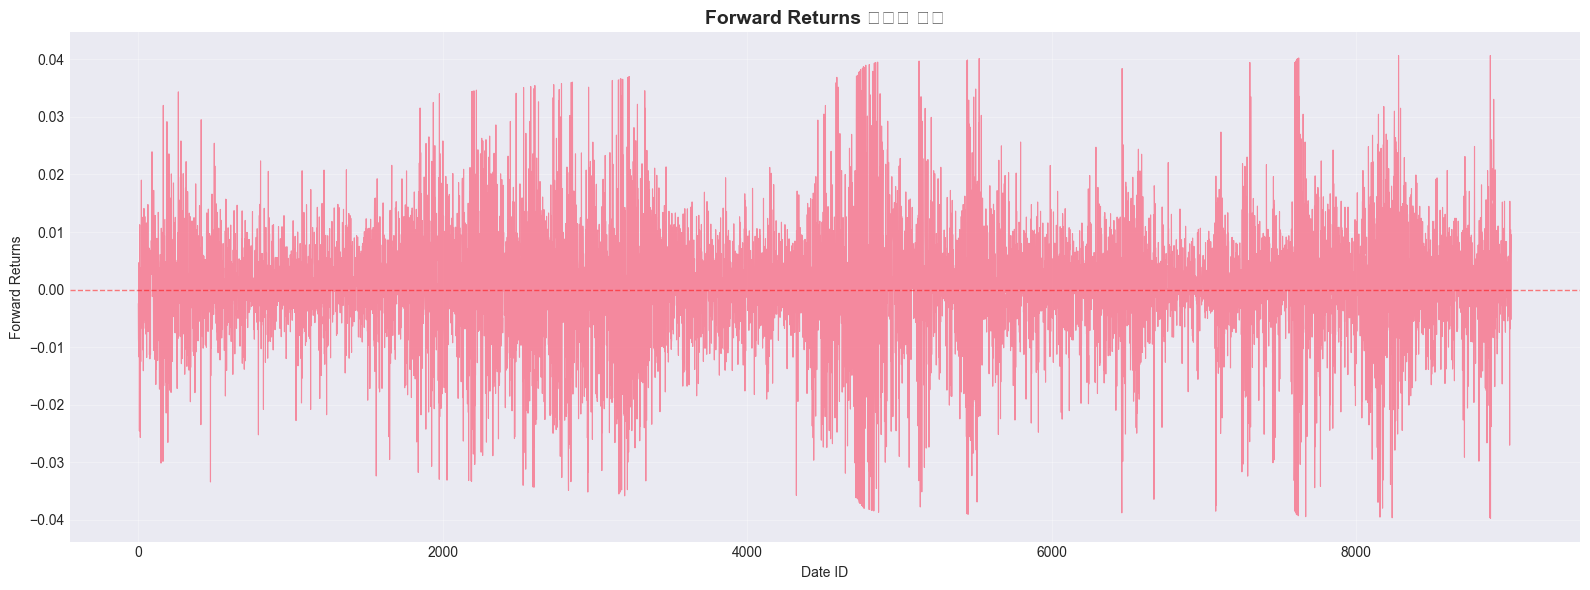

📈 시계열 변동성과 트렌드를 확인할 수 있습니다


In [10]:
# forward_returns 시계열 플롯
plt.figure(figsize=(16, 6))
plt.plot(train['date_id'], train['forward_returns'], linewidth=0.8, alpha=0.8)
plt.axhline(0, color='red', linestyle='--', linewidth=1, alpha=0.5)
plt.title('Forward Returns 시계열 추이', fontsize=14, weight='bold')
plt.xlabel('Date ID')
plt.ylabel('Forward Returns')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("📈 시계열 변동성과 트렌드를 확인할 수 있습니다")

## 6️⃣ 피처 간 상관관계 분석

In [11]:
# 타겟과 피처 간 상관관계 (결측치 적은 피처만)
# 결측치 30% 이하인 피처만 선택
low_missing_cols = missing_stats[missing_stats['Missing %'] < 30].index.tolist()
all_numeric_cols = train.select_dtypes(include=[np.number]).columns.tolist()
selected_cols = [col for col in all_numeric_cols if col not in target_cols and (col not in missing_stats.index or col in low_missing_cols)]

# forward_returns와의 상관관계 계산
correlations = train[selected_cols + ['forward_returns']].corr()['forward_returns'].drop('forward_returns').sort_values(ascending=False)

print("=" * 80)
print("🔗 forward_returns와 상관관계가 높은 피처 (상위 20개)")
print("=" * 80)
print(correlations.head(20))

print("\n" + "=" * 80)
print("🔗 forward_returns와 상관관계가 낮은 피처 (하위 20개)")
print("=" * 80)
print(correlations.tail(20))

🔗 forward_returns와 상관관계가 높은 피처 (상위 20개)
V13    0.063069
S5     0.040469
D2     0.033951
D1     0.033951
V7     0.032741
M17    0.024900
D8     0.024859
E19    0.024821
S6     0.022344
D4     0.016953
D6     0.016696
D5     0.016676
M3     0.016459
E6     0.015528
E9     0.014402
D7     0.010526
E1     0.008651
V6     0.007981
M10    0.007534
M11    0.006985
Name: forward_returns, dtype: float64

🔗 forward_returns와 상관관계가 낮은 피처 (하위 20개)
M7    -0.006811
E18   -0.008302
E13   -0.008610
P11   -0.009281
S7    -0.011419
P3    -0.011849
S9    -0.012614
M18   -0.013050
P10   -0.016675
P7    -0.021678
P12   -0.021858
I2    -0.022723
P5    -0.023120
M12   -0.023940
M8    -0.023961
P8    -0.026106
E12   -0.029627
E11   -0.030872
S2    -0.037614
M4    -0.066756
Name: forward_returns, dtype: float64


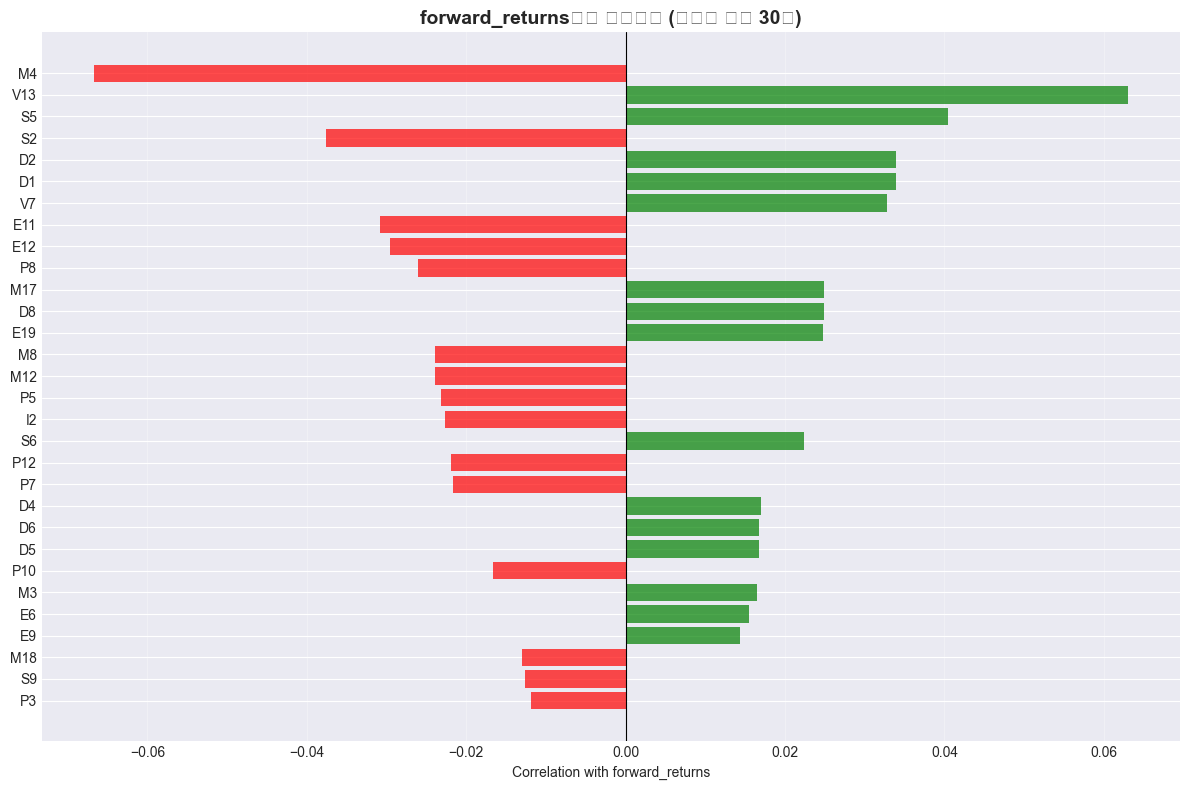

In [12]:
# 상관관계 시각화
plt.figure(figsize=(12, 8))
top_features = correlations.abs().sort_values(ascending=False).head(30)
colors = ['green' if x > 0 else 'red' for x in correlations[top_features.index]]
plt.barh(range(len(top_features)), correlations[top_features.index], color=colors, alpha=0.7)
plt.yticks(range(len(top_features)), top_features.index)
plt.xlabel('Correlation with forward_returns')
plt.title('forward_returns와의 상관관계 (절댓값 상위 30개)', fontsize=14, weight='bold')
plt.axvline(0, color='black', linewidth=0.8)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 7️⃣ Test 데이터의 lagged 피처 확인

In [13]:
# Test 데이터의 lagged 컬럼 확인
lagged_cols = ['lagged_forward_returns', 'lagged_risk_free_rate', 'lagged_market_forward_excess_returns']

print("=" * 80)
print("🔄 TEST 데이터의 Lagged 피처 통계")
print("=" * 80)
print(test[lagged_cols].describe())

print("\n" + "=" * 80)
print("is_scored별 lagged 피처 통계")
print("=" * 80)
print(test[test['is_scored']][lagged_cols].describe())

🔄 TEST 데이터의 Lagged 피처 통계
       lagged_forward_returns  lagged_risk_free_rate  \
count               10.000000              10.000000   
mean                 0.001702               0.000158   
std                  0.005482               0.000002   
min                 -0.007410               0.000155   
25%                 -0.001594               0.000156   
50%                  0.002674               0.000159   
75%                  0.004950               0.000160   
max                  0.008357               0.000162   

       lagged_market_forward_excess_returns  
count                             10.000000  
mean                               0.001232  
std                                0.005483  
min                               -0.007882  
25%                               -0.002063  
50%                                0.002207  
75%                                0.004479  
max                                0.007887  

is_scored별 lagged 피처 통계
       lagged_forward_returns  

## 8️⃣ 주요 인사이트 정리

### 📌 발견 사항

1. **데이터 크기**
   - Train: 9,021개 행, 98개 컬럼
   - Test: 10개 행, 99개 컬럼 (is_scored + lagged 컬럼 추가)

2. **결측치 패턴**
   - 상당수 피처에서 결측치 존재 (특히 초기 데이터)
   - 모델링 시 결측치 처리 전략 필요

3. **타겟 변수**
   - `forward_returns`: 일일 수익률
   - `market_forward_excess_returns`: 시장 초과 수익률 (이미 전처리됨)
   - 변동성이 크고 정규분포에 가까움

4. **피처 그룹**
   - 8개 카테고리로 분류된 피처들
   - 각 그룹의 특성을 활용한 피처 엔지니어링 가능

### ✅ 다음 단계

1. **베이스라인 모델 구축** (Position = 1.0)
2. **결측치 처리 전략 수립**
3. **피처 엔지니어링**
4. **LightGBM 모델 학습**

---

## 💾 분석 결과 저장

In [ ]:
# 결측치 리포트 저장
missing_stats.to_csv('../results/missing_values_report.csv')

# 상관관계 리포트 저장
correlations.to_csv('../results/feature_correlations.csv')

print("✅ 분석 결과가 results 폴더에 저장되었습니다")
print("   - missing_values_report.csv")
print("   - feature_correlations.csv")